In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from shapely.geometry import Point
from shapely import affinity
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d
from matplotlib.patches import Polygon

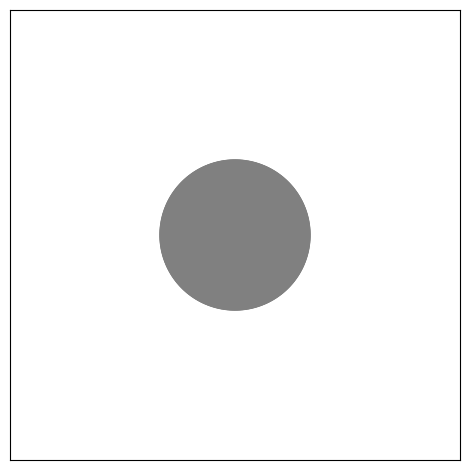

In [5]:
rad = 0.14

a = 1.0 - rad  # semi-major axis (x direction)
b = 1.0 - rad  # semi-minor axis (y direction)
h = 0.0  # center x-coordinate
k = 0.0  # center y-coordinate
n_points = 200  # number of points in the polygon

circle = Point(h, k).buffer(1.0, resolution=200)
ellipse = affinity.scale(circle, xfact=a, yfact=b)

# Get the perimeter length
perimeter = ellipse.length

# Place points at even distances along the boundary
distances = np.linspace(0, perimeter, n_points, endpoint=False)
points = [ellipse.boundary.interpolate(d) for d in distances]

# Convert to numpy array
coords = np.array([[p.x, p.y] for p in points])


s = 3
color = 'grey'

for c in coords:
    plt.gca().add_patch(Circle(c, rad, color=color))
plt.gca().add_patch(Polygon(coords, fill=True, color=color))

plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim(-s, s)
plt.ylim(-s, s)

plt.tight_layout()
plt.savefig(f'shapes/a{a}-b{b}-rad{rad}-n{n_points}.png', dpi=600)

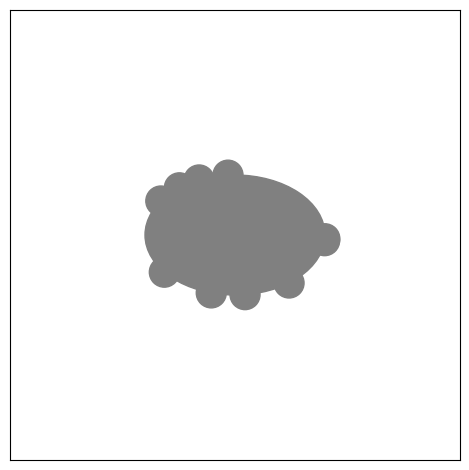

In [55]:
from matplotlib.patches import Circle, Ellipse

rad = 0.2

a = 1.4 - rad  # semi-major axis (x direction)
b = 1.0 - rad  # semi-minor axis (y direction)
h = 0.0  # center x-coordinate
k = 0.0  # center y-coordinate
n_points = 10  # number of points in the polygon

circle = Point(h, k).buffer(1.0, resolution=200)
ellipse = affinity.scale(circle, xfact=a, yfact=b)

# Get the perimeter length
perimeter = ellipse.length

# Place points at even distances along the boundary
distances = np.sort(np.random.uniform(0, perimeter, n_points))
points = [ellipse.boundary.interpolate(d) for d in distances]

# Convert to numpy array
coords = np.array([[p.x, p.y] for p in points])


s = 3
color = 'grey'

# Draw the inner ellipse (not a polygon)
plt.gca().add_patch(Ellipse((h, k), width=2*a, height=2*b, fill=True, color=color))

# Draw circles at the vertices
for c in coords:
    plt.gca().add_patch(Circle(c, rad, color=color))

plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim(-s, s)
plt.ylim(-s, s)

plt.tight_layout()
plt.savefig(f'random-shapes/a{a}-b{b}-rad{rad}-n{n_points}.png', dpi=600)

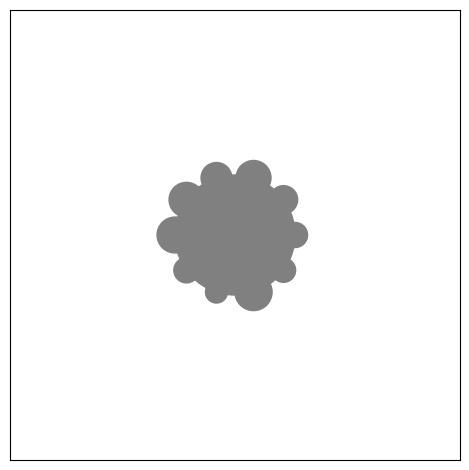

In [60]:
from matplotlib.patches import Circle, Ellipse

rad = 0.2

a = 1.0 - rad  # semi-major axis (x direction)
b = 1.0 - rad  # semi-minor axis (y direction)
h = 0.0  # center x-coordinate
k = 0.0  # center y-coordinate
n_points = 10  # number of points in the polygon

circle = Point(h, k).buffer(1.0, resolution=200)
ellipse = affinity.scale(circle, xfact=a, yfact=b)

# Get the perimeter length
perimeter = ellipse.length

# Place points at even distances along the boundary
distances = np.linspace(0, perimeter, n_points, endpoint=False)
points = [ellipse.boundary.interpolate(d) for d in distances]

# Convert to numpy array
coords = np.array([[p.x, p.y] for p in points])


s = 3
color = 'grey'

# Draw the inner ellipse (not a polygon)
plt.gca().add_patch(Ellipse((h, k), width=2*a, height=2*b, fill=True, color=color))

# Draw circles at the vertices
for c in coords:
    plt.gca().add_patch(Circle(c, np.random.uniform(rad * 0.5, rad * 1.5), color=color))

plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim(-s, s)
plt.ylim(-s, s)

plt.tight_layout()
plt.savefig(f'random-heights/a{a}-b{b}-rad{rad}-n{n_points}.png', dpi=600)

In [6]:
import pandas as pd
cv_df = pd.read_csv('specific-heat.csv')

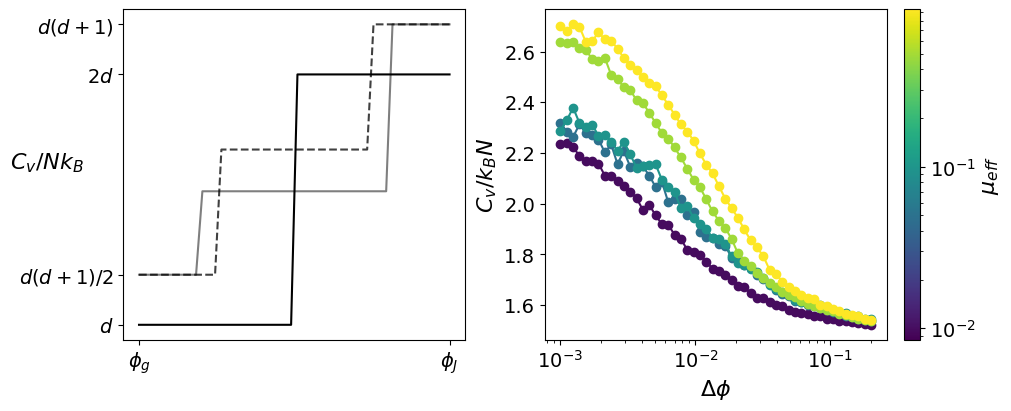

In [33]:
tick_font_size = 14
label_font_size = 16
legend_font_size = 14

fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

x = np.linspace(0,1)

# disk
y = x > 0.5
ax[0].plot(x, y, c='k', alpha=1)

# rough disk
y = (x > 0.25) / 2
y[x > 0.75] = 1
y += 0.2
ax[0].plot(x, y, c='k', alpha=0.75, linestyle='--')

# ellipsoid
y = (x > 0.2) / 3
y[x > 0.8] = 1
y += 0.2
ax[0].plot(x, y, c='k', alpha=0.5)

ax[0].set_xticks([0, 1])
ax[0].set_xticklabels([r'$\phi_g$', r'$\phi_J$'], fontsize=tick_font_size)

ax[0].set_yticks([0, 0.2, 1.0, 1.2])
ax[0].set_yticklabels([r'$d$', r'$d(d+1)/2$', r'$2d$', r'$d(d+1)$'], fontsize=tick_font_size)
ax[0].set_ylabel(r'$C_v/N k_B$', fontsize=label_font_size, rotation=0, labelpad=-20)




from matplotlib.colors import LogNorm
df = pd.read_csv('specific-heat.csv')
mu_norm = LogNorm(vmin=np.min(df.mu), vmax=np.max(df.mu))
cmap = plt.cm.viridis

for nv in np.unique(df.nv):
    if nv != 32:
        continue
    for mu in np.unique(df.mu[df.nv == nv]):
        mask = (df.nv == nv) & (df.mu == mu)
        _df = df[mask]
        delta_phi = _df.delta_phi.values
        cv = _df.cv.values
        cv = cv[np.argsort(delta_phi)]
        delta_phi = delta_phi[np.argsort(delta_phi)]
        ax[1].plot(delta_phi, cv, c=cmap(mu_norm(mu)), marker='o')

    ax[1].set_xscale('log')

    sm = plt.cm.ScalarMappable(norm=mu_norm, cmap=cmap)
    sm.set_array(np.abs(df.mu))
    cbar = plt.colorbar(sm, ax=plt.gca(), label=r'$\mu_{eff}$')
    cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.ax.set_ylabel(r'$\mu_{eff}$', fontsize=label_font_size)

    ax[1].set_xlabel(r'$\Delta \phi$', fontsize=label_font_size)
    ax[1].set_ylabel(r'$C_v / k_B N$', fontsize=label_font_size)

    # set the tick font size
    ax[1].tick_params(labelsize=tick_font_size)



plt.savefig('shapes/cv-graph.png', dpi=600)

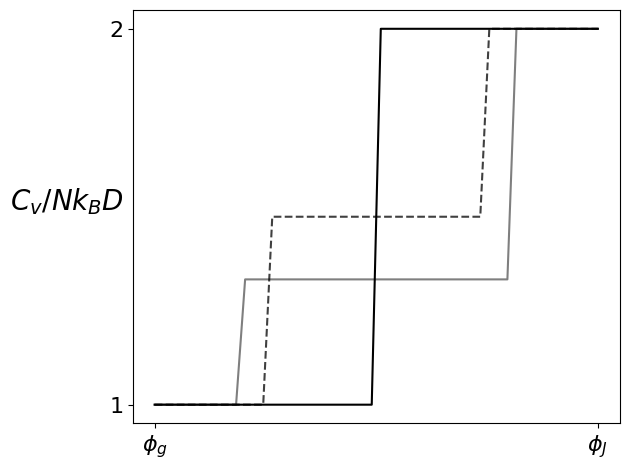

In [8]:
x = np.linspace(0,1)

# disk
y = x > 0.5
plt.plot(x, y, c='k', alpha=1)

# rough disk
x = np.linspace(0,1)
y = (x > 0.25) / 2
y[x > 0.75] = 1
plt.plot(x, y, c='k', alpha=0.75, linestyle='--')

# ellipsoid
x = np.linspace(0,1)
y = (x > 0.2) / 3
y[x > 0.8] = 1
plt.plot(x, y, c='k', alpha=0.5)

plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels([r'$\phi_g$', r'$\phi_J$'], fontsize=16)

plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels([r'$1$', r'$2$'], fontsize=16)
plt.ylabel(r'$C_v/N k_B D$', fontsize=20, rotation=0, labelpad=30)

plt.tight_layout()
plt.savefig('shapes/cv-graph-normalized.png', dpi=600)

In [ ]:
# sphere: 6, 12
# rough sphere: 6, 9, 12
# ellipsoid: 6, (cage 2 rotatations) 8, (cage 3 translations and last rotation), 12

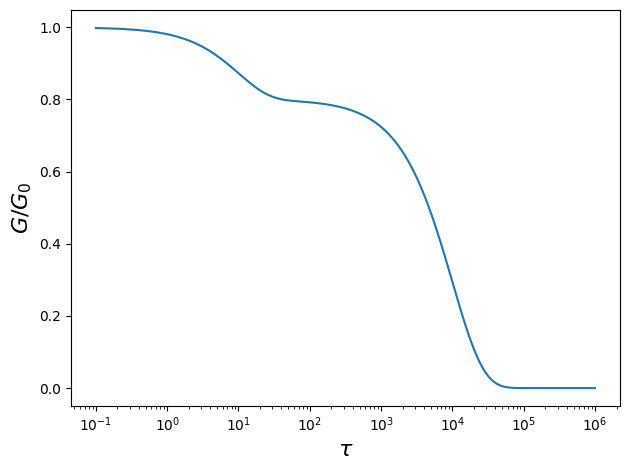

In [77]:
t = np.logspace(-5, 2, 1000)
tau = 1000
mag = 0.2
f = np.exp(-t) * (1 - mag) + np.exp(-t * tau) * mag
plt.plot(t * 1e4, f)
plt.xscale('log')
plt.xlabel(r'$\tau$', fontsize=16)
plt.ylabel(r'$G / G_0$', fontsize=16)
plt.tight_layout()
plt.savefig('curves/aim1.png', dpi=600)


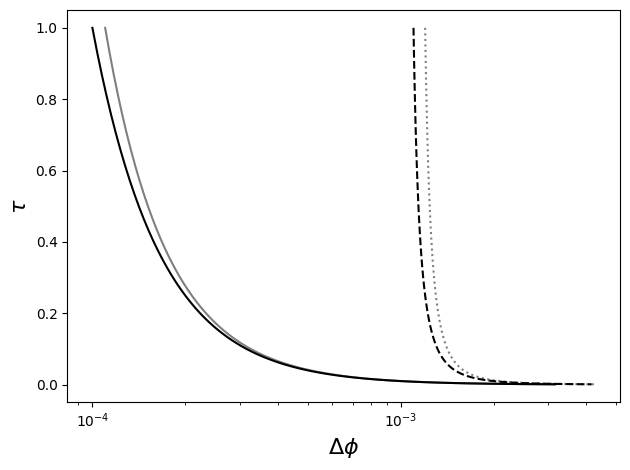

In [107]:
phi = np.logspace(-4, -2.5, 100)
f = 1/phi**2
f /= f.max()
plt.plot(phi, f, color='k')
plt.plot(phi + 1e-5, f, color='k', alpha=0.5)
plt.plot(phi + 1e-3, f, color='k', linestyle='--')
plt.plot(phi + 1e-3 + 1e-4, f, color='k', linestyle=':', alpha=0.5)
plt.xscale('log')
plt.xlabel(r'$\Delta \phi$', fontsize=16)
plt.ylabel(r'$\tau$', fontsize=16)
plt.tight_layout()
plt.savefig('curves/aim2.png', dpi=600)



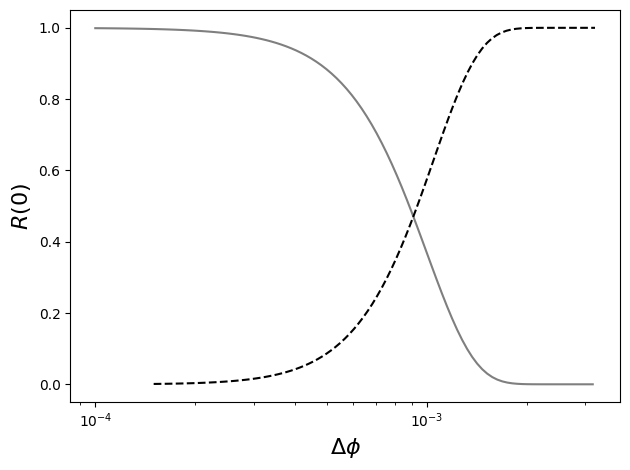

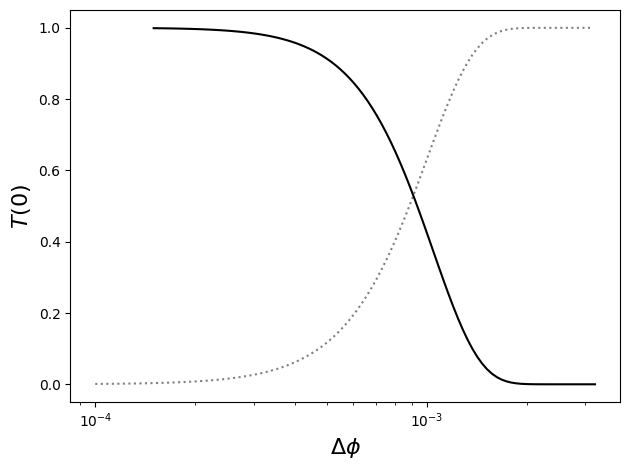

In [146]:
phi = np.logspace(-4, -2.5, 100)
f = 1 - np.exp(-phi ** 3 * 1000000000)
plt.plot(phi, 1 - f, color='k', alpha=0.5)
plt.plot(phi + 5e-5, f, color='k', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\Delta \phi$', fontsize=16)
plt.ylabel(r'$R(0)$', fontsize=16)
plt.tight_layout()
plt.savefig('curves/aim2-2.png', dpi=600)
plt.show()


phi = np.logspace(-4, -2.5, 100)
f = 1 - np.exp(-phi ** 3 * 1000000000)
plt.plot(phi, f, color='k', linestyle=':', alpha=0.5)
plt.plot(phi + 5e-5, 1 - f, color='k')
plt.xscale('log')
plt.xlabel(r'$\Delta \phi$', fontsize=16)
plt.ylabel(r'$T(0)$', fontsize=16)
plt.tight_layout()
plt.savefig('curves/aim2-3.png', dpi=600)
plt.show()




